In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import norm

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML

sns.set()

C:\Users\cmore\AppData\Local\Temp\ipykernel_32920\2156139641.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# The International Interaction Game

<img src="./graphics/general_game.png" />

In [2]:
# import data
data = pd.read_csv("data/interaction_Game_22.csv", delimiter="\t")
# eliminate 1st row
data = data.drop(0, axis=0)
data["Countries"] = data["ISOShNm1"] + "_" + data["ISOShNm2"]
# select subgames from data
subgame_persp1 = data[["Countries", "wrTu1neg", "wrTu1cp1", "wrTu1cp2", "wrTu1wr1", "wrTu1wr2", "cwmidnme"  ]]
subgame_persp2 = data[["Countries", "wrTu2neg", "wrTu2cp2", "wrTu2cp1", "wrTu2wr2", "wrTu2wr1", "cwmidnme"  ]]
subgame_outcomes = data[["ISOShNm1", "ISOShNm2", "cwhost1", "cwhost2"]]

# rename variables for better understanding
subgame_persp1 = subgame_persp1.rename(columns={"wrTu1neg" : "Negotiation_A", "wrTu1cp1" : "Capitulation_A", "wrTu1cp2" : "Capitulation_B", "wrTu1wr1": "War_A", "wrTu1wr2" : "War_B", "cwmidnme" : "description"})
subgame_persp2 = subgame_persp2.rename(columns={"wrTu2neg" : "Negotiation_B", "wrTu2cp2" : "Capitulation_B", "wrTu2cp1" : "Capitulation_A", "wrTu2wr2": "War_B", "wrTu2wr1" : "War_A", "cwmidnme" : "description"})
 

In [3]:
sample = subgame_persp1[["Countries", "Negotiation_A", "Capitulation_A", "Capitulation_B", "War_A", "War_B" ]].dropna()
sample

,Countries,Negotiation_A,Capitulation_A,Capitulation_B,War_A,War_B
1,RUSSIAN FEDERATION_TURKEY,-0.096173,-1.706594,1.618020,-0.749125,-1.092421
2,TURKEY_RUSSIAN FEDERATION,-0.811174,-2.066987,0.750678,-1.066327,-1.434310
3,FRANCE_SPAIN,0.238525,-1.071654,1.487123,-0.392220,-0.752379
4,None_ITALY,0.956377,-1.222313,1.229662,0.516025,0.398660
5,None_None,0.735968,-1.309080,1.266283,0.288853,0.128104
...,...,...,...,...,...,...
493,CYPRUS_TURKEY,-0.593052,-1.642378,0.525796,-0.984870,-1.403650
494,RUSSIAN FEDERATION_UNITED KINGDOM,0.466918,-1.917804,1.487351,0.704776,0.586668
495,TURKEY_CYPRUS,0.663469,-0.673645,0.720957,0.393720,0.307918
496,UNITED KINGDOM_PORTUGAL,0.856604,0.645648,0.162048,0.074418,-0.002912


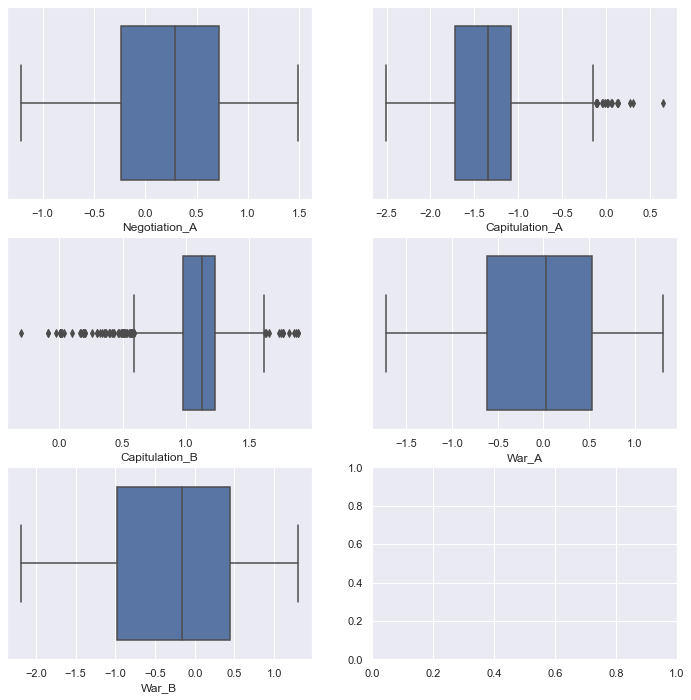

In [4]:
_, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(sample.columns.drop("Countries"), axs):
    sx = sns.boxplot(x=img, data=sample, ax=ax)
    #sx.set_title(img)
plt.show()


<AxesSubplot:title={'center':'Capitulation_A vs. Capitulation_B'}, xlabel='Conflicts', ylabel='Utility'>

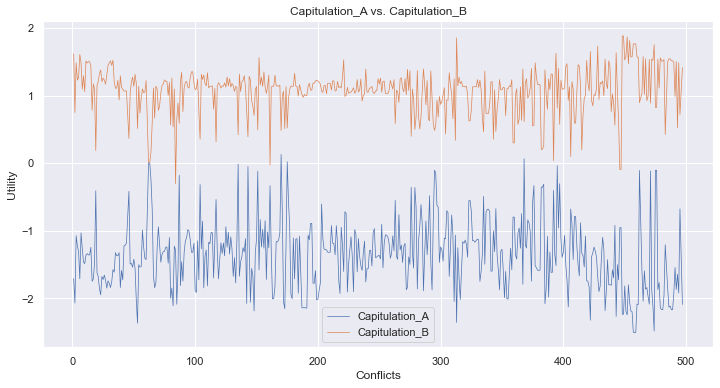

In [5]:
_, axs = plt.subplots(1, 1, figsize=(12, 6))
sub_sample = sample[ sample.Capitulation_B >= sample.Capitulation_A ]
sub_sample[["Capitulation_A", "Capitulation_B"]].plot( kind="line", ax = axs, title="Capitulation_A vs. Capitulation_B", 
linewidth =0.7, xlabel="Conflicts", ylabel="Utility" )

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Capitulation_A vs. Capitulation_B'}, xlabel='Conflicts', ylabel='Utility'>

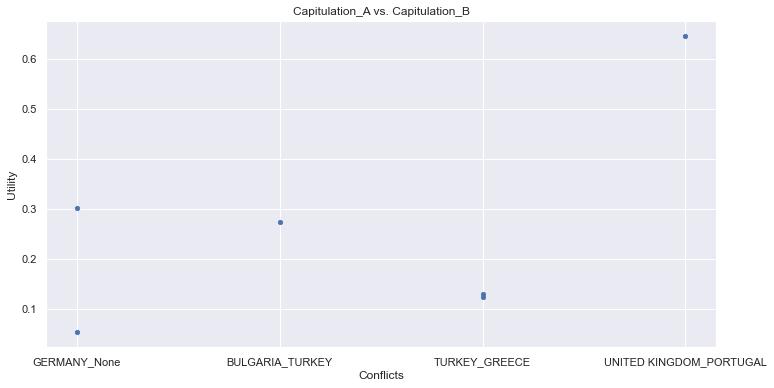

In [6]:
_, axs = plt.subplots(1, 1, figsize=(12, 6))
sub_sample = sample[ sample.Capitulation_B < sample.Capitulation_A ]
sub_sample[["Countries", "Capitulation_A", "Capitulation_B"]].plot( kind="scatter", x="Countries", y="Capitulation_A", ax = axs, title="Capitulation_A vs. Capitulation_B", 
linewidth =0.7, xlabel="Conflicts", ylabel="Utility" )

### Finding the  countries that engaegd in more conflicts

In [7]:
countries_freq = data[["ISOShNm1", "year"]].groupby("ISOShNm1").count()
countries_freq.sort_values(ascending=False, by="year")

,year
ISOShNm1,
GERMANY,78
RUSSIAN FEDERATION,75
UNITED KINGDOM,62
ITALY,51
None,48
FRANCE,42
GREECE,20
TURKEY,19
UNITED STATES,16


### Creating dataframes for the three countries that engaged in more conflicts


In [8]:
countries = data[ (data.ISOShNm1 == "GERMANY") | (data.ISOShNm1=="RUSSIAN FEDERATION") | (data.ISOShNm1 == "UNITED KINGDOM") | (data.ISOShNm1 == "ITALY") ]
countries

,ccode1,ccode2,year,ISO3let1,ISO3let2,ISOShNm1,ISOShNm2,rlregion,region1,region2,...,cwongonm,cwinit,cwhost1,cwhost2,cwhostd,cwinitnm,cwdynm,cwkeynum,cwmidnme,Countries
1,365.0,640.0,1817.0,RUS,TUR,RUSSIAN FEDERATION,TURKEY,2.0,1.0,2.0,...,0.0,1.0,3.0,3.0,3.0,3321.0,332101.0,3321.0,Murder of Czerney George of Russia,RUSSIAN FEDERATION_TURKEY
6,365.0,640.0,1821.0,RUS,TUR,RUSSIAN FEDERATION,TURKEY,2.0,1.0,2.0,...,0.0,1.0,3.0,4.0,4.0,142.0,14201.0,142.0,Morea Insurrection,RUSSIAN FEDERATION_TURKEY
8,200.0,230.0,1825.0,GBR,ESP,UNITED KINGDOM,SPAIN,1.0,1.0,1.0,...,0.0,1.0,4.0,1.0,4.0,3233.0,323301.0,3233.0,NaN,UNITED KINGDOM_SPAIN
9,325.0,640.0,1825.0,ITA,TUR,ITALY,TURKEY,1.0,1.0,2.0,...,0.0,1.0,4.0,4.0,4.0,1735.0,173501.0,1735.0,NaN,ITALY_TURKEY
10,365.0,640.0,1826.0,RUS,TUR,RUSSIAN FEDERATION,TURKEY,2.0,1.0,2.0,...,0.0,1.0,3.0,1.0,3.0,64.0,6401.0,64.0,Danubian Principalities,RUSSIAN FEDERATION_TURKEY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,365.0,260.0,1964.0,RUS,xxx,RUSSIAN FEDERATION,None,1.0,1.0,1.0,...,0.0,1.0,3.0,1.0,3.0,2908.0,290801.0,2908.0,NaN,RUSSIAN FEDERATION_None
491,365.0,380.0,1964.0,RUS,SWE,RUSSIAN FEDERATION,SWEDEN,1.0,1.0,1.0,...,0.0,1.0,3.0,1.0,3.0,2907.0,290701.0,2907.0,NaN,RUSSIAN FEDERATION_SWEDEN
494,365.0,200.0,1965.0,RUS,GBR,RUSSIAN FEDERATION,UNITED KINGDOM,1.0,1.0,1.0,...,0.0,1.0,3.0,1.0,3.0,2915.0,291501.0,2915.0,NaN,RUSSIAN FEDERATION_UNITED KINGDOM
496,200.0,235.0,1966.0,GBR,PRT,UNITED KINGDOM,PORTUGAL,1.0,1.0,1.0,...,0.0,1.0,3.0,1.0,3.0,3135.0,313501.0,3135.0,UK embargo of Rhodesia,UNITED KINGDOM_PORTUGAL


In [9]:
sampled_data = countries[ ["ISOShNm1", "ISOShNm2", "year" ]]
sampled_data.groupby(["ISOShNm1",	"ISOShNm2"]).count().to_csv("coutries.csv")

In [ ]:
HTML(url="https://public.flourish.studio/story/1607392/")


## Busemesyer's Projection Model

<img src="graphics/projection_model_notes_v2.png" width="700px" />

In [7]:
# define initial state (full uncertainty)
def create_initial_state( dims ):
  return np.ones( (dims,1) )*(1/(np.sqrt(dims)))

def test_normalisation( vector ):
  return np.sum( np.power(vector, 2) ) == 1

def rotation_matrix( dims, params ):
  rotation = np.zeros([dims,dims])
  if dims == 2:
    rotation[0,0] = np.round(np.cos(params[0]),4)
    rotation[0,1] = -np.round(np.sin(params[0]),4)
    rotation[1,0] = np.round(np.sin(params[0]),4)
    rotation[1,1] = np.round(np.cos(params[0]), 4)
  
  return rotation

def select_basis( dims, pos ):
  basis = np.zeros([dims, 1])
  basis[pos] = 1
  return basis  

# define players projection operators
# player A | player B
def proj_operator_player( basis_vector ):
  return np.dot(basis_vector, basis_vector.T)


### Computing Outcome Probabilities

,year
ISOShNm1,
GERMANY,78
RUSSIAN FEDERATION,75
UNITED KINGDOM,62
ITALY,51
None,48
FRANCE,42
GREECE,20
TURKEY,19
UNITED STATES,16


In [9]:
# war or big war
warA_warB = subgame_outcomes[ (subgame_outcomes.cwhost1 >= 4) & (subgame_outcomes.cwhost2 >=4) ]
# capitulation of B
warA_not_warB = subgame_outcomes[ (subgame_outcomes.cwhost1 >= 4) & (subgame_outcomes.cwhost2 < 4) ]
# capitulation of A
not_warA_warB = subgame_outcomes[ (subgame_outcomes.cwhost1 < 4) & (subgame_outcomes.cwhost2 >=4) ]
# negotiation (not war, not cap)
negotiation = subgame_outcomes[ (subgame_outcomes.cwhost1 == subgame_outcomes.cwhost2 ) & ( (subgame_outcomes.cwhost1 < 4) | (subgame_outcomes.cwhost2 < 4) )]

### What is the Probability that both countries engage in War?

<img src="graphics/war_outcome.png">

$$ Pr(WarB~,~WarA) :   F_{\bar{B}} \rightarrow F_{A} \rightarrow F_{B} ~~~ or ~~~ F_{B} \rightarrow F_{A}$$

In [9]:
prob_WarB_WarA = len(warA_warB)/len(subgame_outcomes)
prob_WarB_WarA

0.25903614457831325

In [10]:
df = pd.DataFrame([], columns=["i", "j", "prob"])

cnt = 0
for i in np.arange(-2*np.pi, 2*np.pi, 0.01):
  for j in np.arange(-2*np.pi, 2*np.pi, 0.01):
    i = np.round(i, 4)
    j = np.round(j, 4)
    
    # define the superposition state for player B
    S = create_initial_state( dims=2 )

    # define projector operarator for player B applying Force : F_B
    # pos = 0 means setting 1 in position 0 of the basis vect (Force = True)
    # pos = 1 means setting 1 in position 1 of the basis vect (Force = False)
    basis_vec_FB = select_basis( dims=2, pos=0 )
    FB = proj_operator_player( basis_vec_FB )

    basis_vec_not_FB = select_basis( dims=2, pos=1 )
    F_notB = proj_operator_player( basis_vec_not_FB )

    # define the basis for player A
    R1 = rotation_matrix( 2, [i] ) # setting initially theta = i
    R2 = rotation_matrix( 2, [j] ) # setting initially theta = j

    # define projector operarator for player A applying Force : F_A
    basis_vec_FA = select_basis( dims=2, pos=0 )
    FA_2 = np.dot(R2, basis_vec_FA)
    FA_1 = np.dot(R1, basis_vec_FA)

    # compute probability | S -> FB -> FA |^2
    proj1 =  np.dot(FA_1, np.dot( FB , S ).T)
    proj2 = np.dot(FB, np.dot( FA_2, np.dot( F_notB , S ).T))

    prob = np.power(norm(proj1 + proj2), 2)
    df.loc[cnt, :] = [i, j, prob]
    cnt = cnt + 1

df.to_csv("results.csv")

KeyboardInterrupt: 